In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'C:\Users\user\Desktop\Exel files\insurance.csv')

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df['sex_num'] = 1
for x in range(0, 1338):
    if (df['sex'][x] == 'male') :
        df['sex_num'][x] = 0

In [7]:
df['smoker_num'] = 0
for x in range(0, 1338):
    if (df['smoker'][x] == 'yes') :
        df['smoker_num'][x] = 1

In [8]:
# df.groupby('region')[['region']].count()
df['region_num'] = 0
for x in range(0, 1338):
    if (df['region'][x] == 'northeast') :
        df['region_num'][x] = 0
    elif (df['region'][x] == 'northwest') :
        df['region_num'][x] = 1
    elif (df['region'][x] == 'southeast') :
        df['region_num'][x] = 2
    elif (df['region'][x] == 'southwest') :
        df['region_num'][x] = 3

In [9]:
df = DataFrame (df, columns=['age','sex','sex_num','bmi','children', 'smoker', 'smoker_num', 'region', 'region_num', 'charges'])
df.head(9)

,age,sex,sex_num,bmi,children,smoker,smoker_num,region,region_num,charges
0,19,female,1,27.900,0,yes,1,southwest,3,16884.92400
1,18,male,0,33.770,1,no,0,southeast,2,1725.55230
2,28,male,0,33.000,3,no,0,southeast,2,4449.46200
3,33,male,0,22.705,0,no,0,northwest,1,21984.47061
4,32,male,0,28.880,0,no,0,northwest,1,3866.85520
5,31,female,1,25.740,0,no,0,southeast,2,3756.62160
6,46,female,1,33.440,1,no,0,southeast,2,8240.58960
7,37,female,1,27.740,3,no,0,northwest,1,7281.50560
8,37,male,0,29.830,2,no,0,northeast,0,6406.41070


Text(0.5,1,'Distribution of charges for non-smokers')

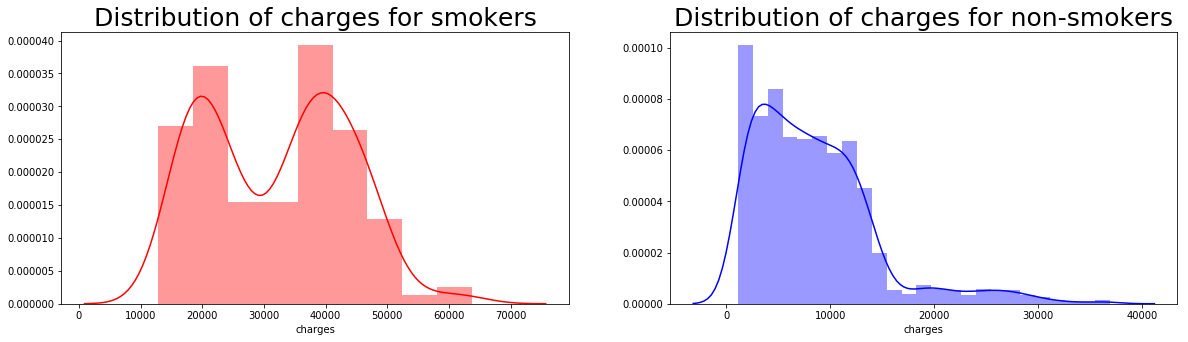

In [10]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(df[(df.smoker_num == 1)]["charges"],color='r',ax=ax)
ax.set_title('Distribution of charges for smokers', loc='Center', fontsize=25)

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker_num == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers', loc='Center', fontsize=25)

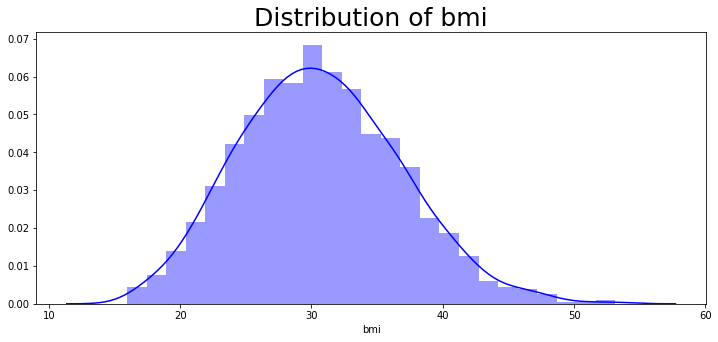

In [11]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi", loc='Center', fontsize=25)
ax = sns.distplot(df["bmi"], color = 'b')

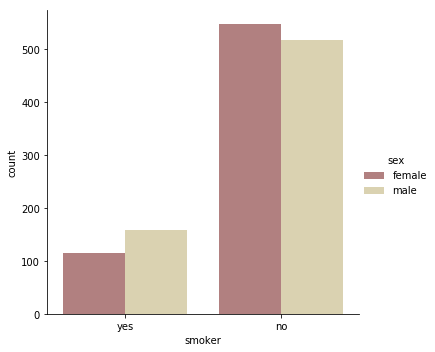

In [12]:
sns.catplot(x="smoker", kind="count",hue ='sex', palette="pink", data=df)


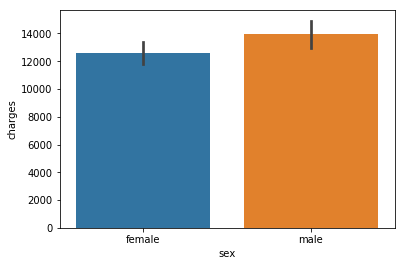

In [13]:
sns.barplot(x=df.sex,y=df.charges)

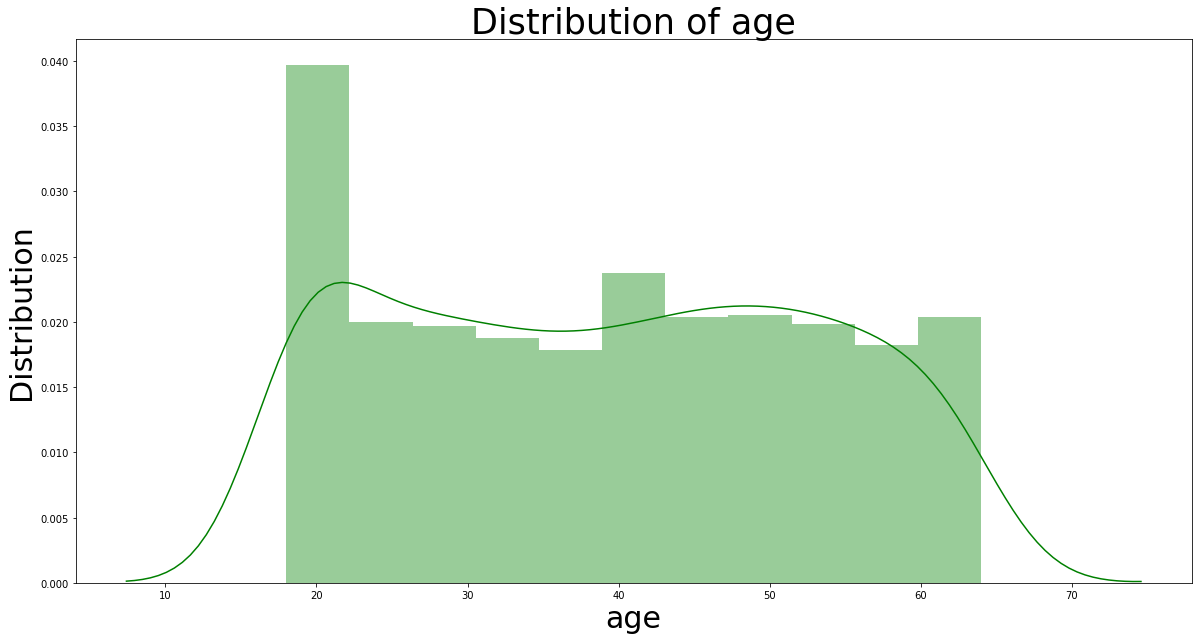

In [14]:
plt.figure(figsize=(20,10))
plt.xlabel('age', fontsize=30)
plt.ylabel('Distribution', fontsize=30)
plt.title("Distribution of age", loc='Center', fontsize=35)
ax = sns.distplot(df["age"], color = 'green')

Text(0.5,1,'The number of smokers and non-smokers (18 years old)')

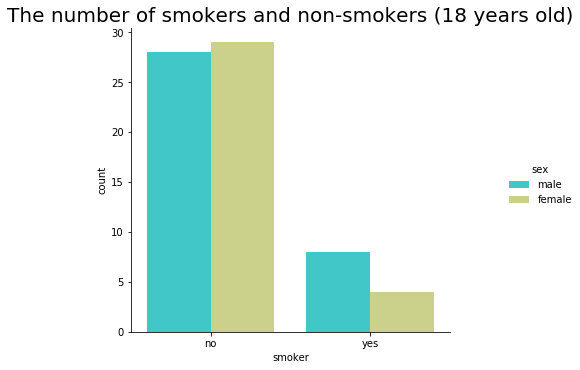

In [15]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)", loc='Center', fontsize=20)


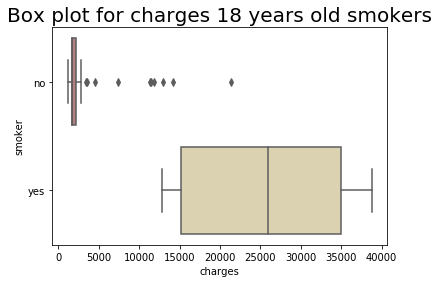

In [16]:
plt.title("Box plot for charges 18 years old smokers", loc='Center', fontsize=20)
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

In [17]:
x = df.drop(['charges', 'smoker', 'sex', 'region', 'region_num' ],axis=1)
x.head(3)

,age,sex_num,bmi,children,smoker_num
0,19,1,27.90,0,1
1,18,0,33.77,1,0
2,28,0,33.00,3,0


In [18]:
y = df['charges']
y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [20]:

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
LR = LinearRegression().fit(x_train,y_train)

y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

print(LR.score(x_test,y_test))

0.7952171980481992


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rfc=RandomForestRegressor(n_estimators=110)

trainx=df[[ 'bmi', 'age']].iloc[:1070].values
trainy=df[['charges']].iloc[:1070].values
testx=df[['bmi', 'age']].iloc[1070:]
testy=df[['charges']].iloc[1070:]

rfc.fit(trainx, trainy)
pred_cost=rfc.predict(testx)

print(rfc.score(trainx, trainy))

0.8247397001136452
